Recommendation System

Overview of the Project 
While visiting a shopping mall, many salesmen often try to recommend the customers exciting deals and offers that might of interest them. <br>
Similarly, e-commerce sites use recommender systems to suggest products to their customers that they are highly likely to buy. 

Problem Statement: 
In this data science project, you will build collaborative filtering algorithm based recommender system.

Data Description 
The data is contained in a csv file, named ’ratings_beauty.csv’ <br>
It has four types of values: userid, productid, ratings, and timestamp. <br>
UserId and Productid are used for identification purposes. <br>
Ratings are the feedback provided by the user corresponding to a product in that row <br>
Timestamp represents the time at which user submitted the rating. <br>
The file has about 2 million reviews and ratings for beauty products available on Amazon.<br>

__Learnings from the Project__ <br>
Introduction to Recommender Systems <br>
Popular Exploratory Data Analysis (EDA) Techniques <br>
Data Visualization <br>
Data Encoding Methods <br>
Cosine Similarity and Centres Cosine Similarity <br>
User-Item Matrix <br>
Ways to identify similar customers<br>


#### Brief Note on Collaborative Filtering #####

__Collaborative filtering__ is a technique that can filter out items that a user might like on the basis of reactions by similar users. They rely on the assumption that similar users like similar items. Similarity measures between users and/or items are used to make recommendations.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

To build a system that can automatically recommend items to users based on the preferences of other users, the first step is to find similar users or items. The second step is to predict the ratings of the items that are not yet rated by a user. So, you will need the answers to these questions:

One important thing to keep in mind is that in an approach based purely on collaborative filtering, the similarity is not calculated using factors like the age of users, genre of the movie, or any other data about users or items. It is calculated only on the basis of the rating (explicit or implicit) a user gives to an item. For example, two users can be considered similar if they give the same ratings to ten movies despite there being a big difference in their age.

__User-Based vs Item-Based Collaborative Filtering__
The technique in the examples explained above, where the rating matrix is used to find similar users based on the ratings they give, is called user-based or user-user collaborative filtering. If you use the rating matrix to find similar items based on the ratings given to them by users, then the approach is called item-based or item-item collaborative filtering.

The two approaches are mathematically quite similar, but there is a conceptual difference between the two. Here’s how the two compare:

__User-based:__ For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

__Item-based:__ For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ds = pd.read_csv(r"C:\Users\AKINKUGBE ABIOLA\Desktop\Stutern\ratings_Beauty.csv")

In [122]:
ds

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [123]:
ds.isnull().sum()
# No Null Values

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [124]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2023070.0,4.149036e+00,1.311505e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,2023070.0,1.360389e+09,4.611860e+07,908755200.0,1.350259e+09,1.372810e+09,1.391472e+09,1.406074e+09


_Rating_: The mean is lesser than the median. That show that the dataset  is skewed <br>
_TimeStamp_: The mean is not quite different from the median. That shows the dataset is normally distributed

In [3]:
ds['Rating'].value_counts()

5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
Name: Rating, dtype: int64

C:\Users\AKINKUGBE ABIOLA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

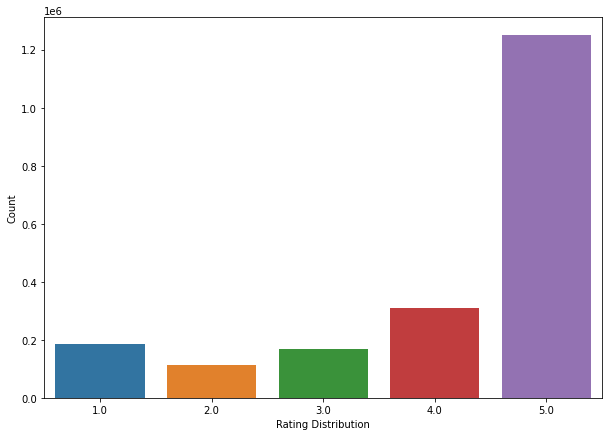

In [126]:
# Show the distribution in the graph below
plt.subplots(figsize=(10,7))
sns.countplot(df['Rating'])
plt.xlabel('Rating Distribution', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [127]:
ds['ProductId'].nunique()
# there are 249274 products in total

249274

In [4]:
df = ds.copy()

__Removing Noise from the data__<br>
In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. We wouldn’t want movies that were rated by a small number of users because it’s not credible enough.<br> Similarly, users who have rated only a handful of movies should also not be taken into account.



So we first take cognizance of users who have given above 30 ratings

In [7]:
users_counts = df['UserId'].value_counts().rename('users_counts')
users_data   = df.merge(users_counts.to_frame(),
                                left_on='UserId',
                                right_index=True)

In [12]:
users_data

,UserId,ProductId,Rating,Timestamp,users_counts
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,4
899125,A39HTATAQ9V7YF,B002OVV7F0,3.0,1369699200,4
969482,A39HTATAQ9V7YF,B0031IH5FQ,5.0,1369699200,4
1499680,A39HTATAQ9V7YF,B006GQPZ8E,4.0,1369699200,4
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,2
...,...,...,...,...,...
2023054,ADQ41IJPQW2TN,B00LNOKBYW,5.0,1405728000,1
2023058,A1SJD7QDROVPCC,B00LNOKBYW,5.0,1405296000,1
2023059,AFPRQT3V8C1U1,B00LNOKBYW,5.0,1405468800,1
2023061,A1RYQPQ01T5D5R,B00LNOKBYW,5.0,1406073600,1


In [17]:
# Select the users who has given above 30 number of ratings
subset_user = users_data[users_data.users_counts >= 30]
subset_user.shape

(58289, 5)

We take cognizance of products that has above 10 rating

In [21]:
product_count = df['ProductId'].value_counts().rename('product_count')
product_data = df.merge(product_count.to_frame(),
                                left_on='ProductId',
                                right_index=True)
                                
product_data.shape

(2023070, 5)

#### __Model Based System__

In [1]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [3]:
df = ds.copy()

In [4]:
# Since we dont have use for Timestamp, we drop it
df.drop('Timestamp', axis=True, inplace=True)

In [5]:
# Taking Subset of users who have given 50 or more number of ratings :-
Users_counts = df['UserId'].value_counts().rename('Users_counts')
df  = df.merge(Users_counts.to_frame(),
                                left_on='UserId',
                                right_index=True)
df.head()

,UserId,ProductId,Rating,Users_counts
0,A39HTATAQ9V7YF,0205616461,5.0,4
899125,A39HTATAQ9V7YF,B002OVV7F0,3.0,4
969482,A39HTATAQ9V7YF,B0031IH5FQ,5.0,4
1499680,A39HTATAQ9V7YF,B006GQPZ8E,4.0,4
1,A3JM6GV9MNOF9X,0558925278,3.0,2


In [6]:
df.sort_values(by = ['Users_counts'], ascending = False).head()

,UserId,ProductId,Rating,Users_counts
1429936,A3KEZLJ59C1JVH,B005NBRX2O,2.0,389
1247399,A3KEZLJ59C1JVH,B004IT5478,4.0,389
1320382,A3KEZLJ59C1JVH,B004WYBCJI,3.0,389
1318364,A3KEZLJ59C1JVH,B004WNWX4M,5.0,389
1790817,A3KEZLJ59C1JVH,B00AFY8QUM,3.0,389


In [9]:
# Select the users who has given above 30 number of ratings
df = df[df.Users_counts >= 40]
df.shape

(40659, 4)

In [7]:
# There are 2 millions user ratings. Select only products that above 30 ratings

Product_Rating_Counts = df['ProductId'].value_counts().rename('Product_Rating_Counts')
df   = df.merge(Product_Rating_Counts.to_frame(),
                                left_on='ProductId',
                                right_index=True)
df.head()

,UserId,ProductId,Rating,Users_counts,Product_Rating_Counts
0,A39HTATAQ9V7YF,0205616461,5.0,4,1
899125,A39HTATAQ9V7YF,B002OVV7F0,3.0,4,346
899372,A3BTN14HIZET6Z,B002OVV7F0,4.0,23,346
899278,A2C58G8O40YC7T,B002OVV7F0,5.0,186,346
899291,A285W83NMJ5W8W,B002OVV7F0,5.0,7,346


In [11]:
# Select product with above 70 rating entries
df = df[df.Product_Rating_Counts >= 30]
df.head()
print(df.shape)

(4286, 5)


In [99]:
df.head()

,UserId,ProductId,Rating,Users_counts,Product_Rating_Counts
1081714,AKJHHD5VEH7VG,B003P904EA,4.0,90,31
1081738,A2VOGNBUMXSW13,B003P904EA,4.0,62,31
1081775,A19SDJ2TSSL8HI,B003P904EA,4.0,46,31
1081841,A1TPW86OHXTXFC,B003P904EA,4.0,182,31
1081885,A2GHU8I0P3HFRW,B003P904EA,4.0,42,31


We have achieved the end for which we needed Users_Count and Product_rating_Count, so we drop them

In [8]:
dff = df.drop(['Users_counts', 'Product_Rating_Counts'], axis = 1)
dff.head()

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
899125,A39HTATAQ9V7YF,B002OVV7F0,3.0
899372,A3BTN14HIZET6Z,B002OVV7F0,4.0
899278,A2C58G8O40YC7T,B002OVV7F0,5.0
899291,A285W83NMJ5W8W,B002OVV7F0,5.0


#### __Popularity Based Model__

In [9]:
# Sort the dataset by ProductId and the ratings based on their mean(). Select 10 highly rated Products

recommendation = pd.DataFrame(dff.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head(10))
recommendation['Rating_Count'] = pd.DataFrame(dff.groupby('ProductId')['Rating'].count())
recommendation.sort_values(by=['Rating_Count'], ascending= False).head(10)

,Rating,Rating_Count
ProductId,,
B00550YQP0,5.0,3
B0054ZSIXC,5.0,2
B00550UX52,5.0,2
B0055189P2,5.0,2
B00551BAAI,5.0,2
0205616461,5.0,1
B00551HYQC,5.0,1
B00551EJWE,5.0,1
B00551I2ZY,5.0,1


In [14]:
# Popularity based on the mean of the most rated

popularity = recommendation.sort_values(by=['Rating_Count'], ascending=False)
popularity.head(10)

,Rating,Rating_Count
ProductId,,
B00AWLB9G6,4.480769,52
B009YSSLAU,4.461538,52
B000E0K7NQ,4.477273,44
B00A0J09G6,4.431818,44
B00A0J09C0,4.564103,39
B000142FVW,4.540541,37
B00AWLBACE,4.750000,36
B001ECQ4JE,4.428571,35
B00AE07FUE,4.454545,33
